In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [3]:
with open("analysis/society-ipd-threshold-0.2.pickle", "rb") as f:
    data = pickle.load(f)

In [4]:
weight_df = pd.DataFrame(
    [
        ["train", population, lb, w]
        for (population, lb, t), weights in data["train_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ]
    + [
        ["test", population, lb, w]
        for (population, lb, t), weights in data["test_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ],
    columns=["phase", "population", "lookback", "weight"],
)

weight_df

,phase,population,lookback,weight
0,train,16,1,0.898891
1,train,16,1,0.483934
2,train,16,1,0.899315
3,train,16,1,0.897190
4,train,16,1,0.904091
...,...,...,...,...
69686395,test,512,5,0.777778
69686396,test,512,5,0.816327
69686397,test,512,5,0.694444
69686398,test,512,5,0.675000


(0.0, 1.0)

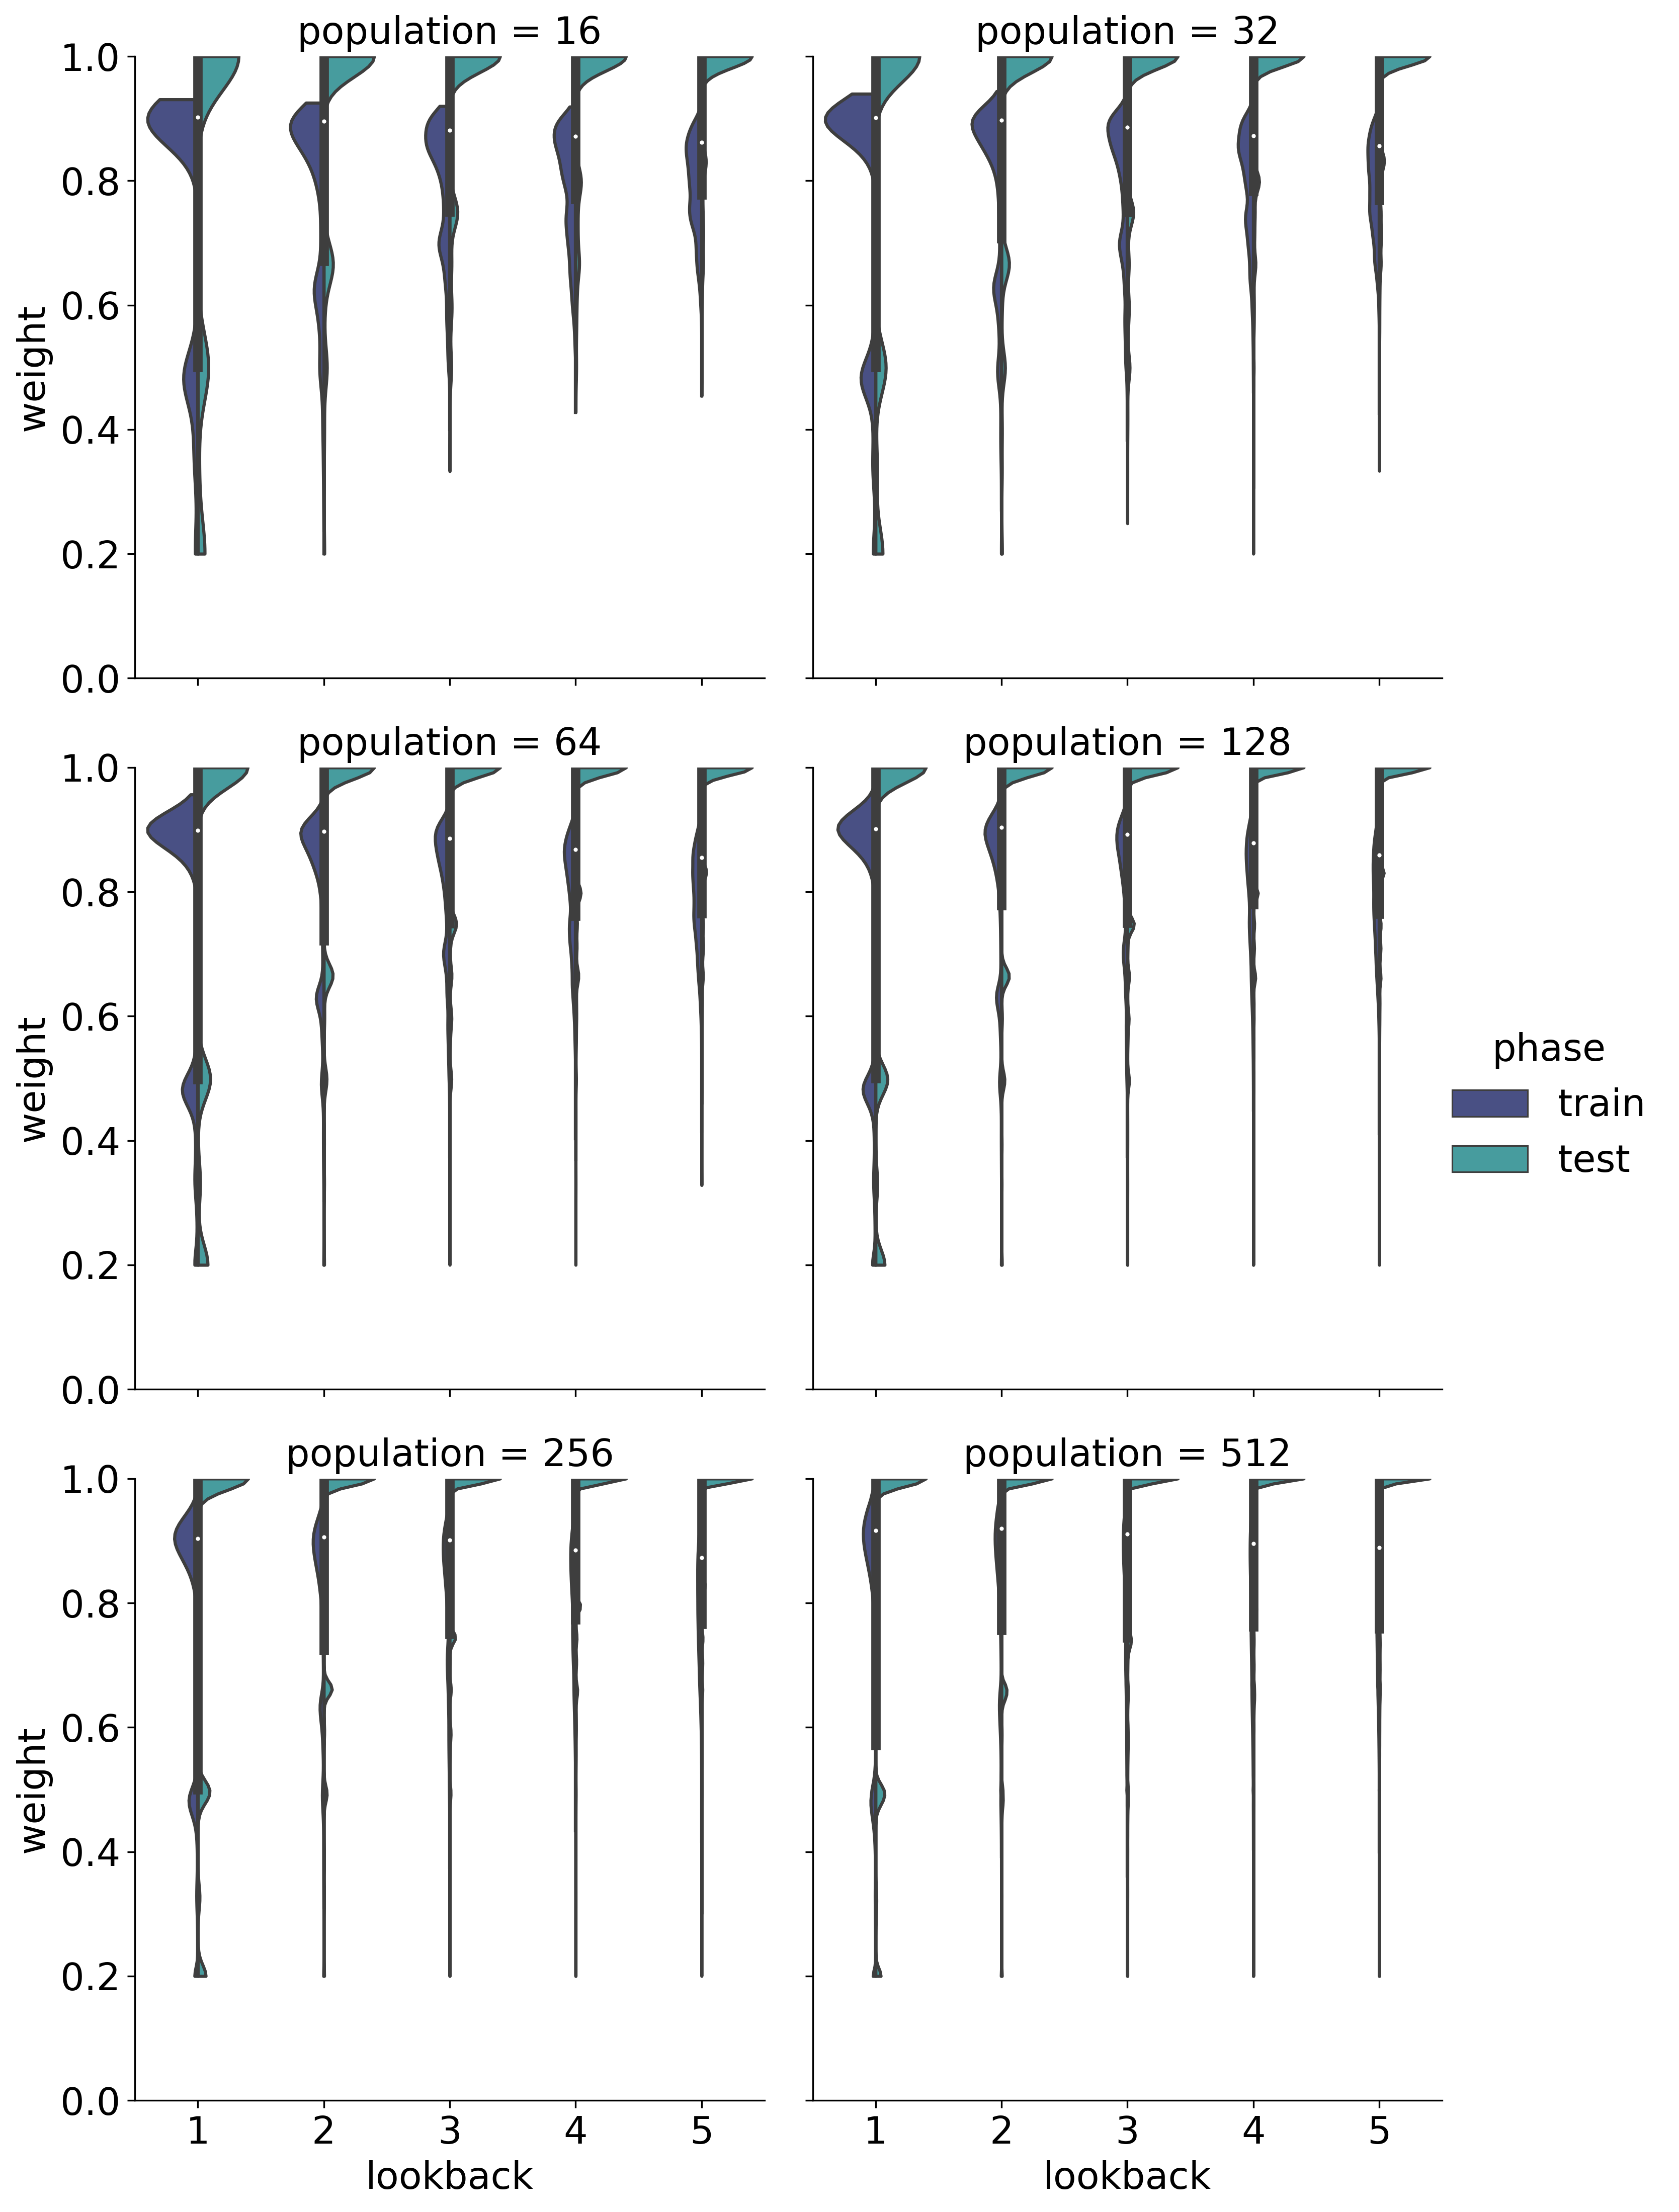

In [5]:
sns.catplot(
    data=weight_df,
    x="lookback",
    y="weight",
    hue="phase",
    col="population",
    palette="mako",
    col_wrap=2,
    kind="violin",
    cut=0,
    split=True,  # bw=.15,
)

plt.ylim(0.0, 1.0)

In [6]:
reward_df = pd.DataFrame(
    [
        ["train", population, lb, reward]
        for (population, lb, t), rewards in data["train_mean_reward"].items()
        for reward in rewards
    ]
    + [
        ["test", population, lb, reward]
        for (population, lb, t), rewards in data["test_mean_reward"].items()
        for reward in rewards
    ],
    columns=["phase", "population", "lookback", "mean_reward"],
)

reward_df

,phase,population,lookback,mean_reward
0,train,16,1,2.871041
1,train,16,1,2.882675
2,train,16,1,2.880228
3,train,16,1,2.895247
4,train,16,1,2.832181
...,...,...,...,...
1195,test,512,5,2.974449
1196,test,512,5,2.976523
1197,test,512,5,2.970596
1198,test,512,5,2.982071


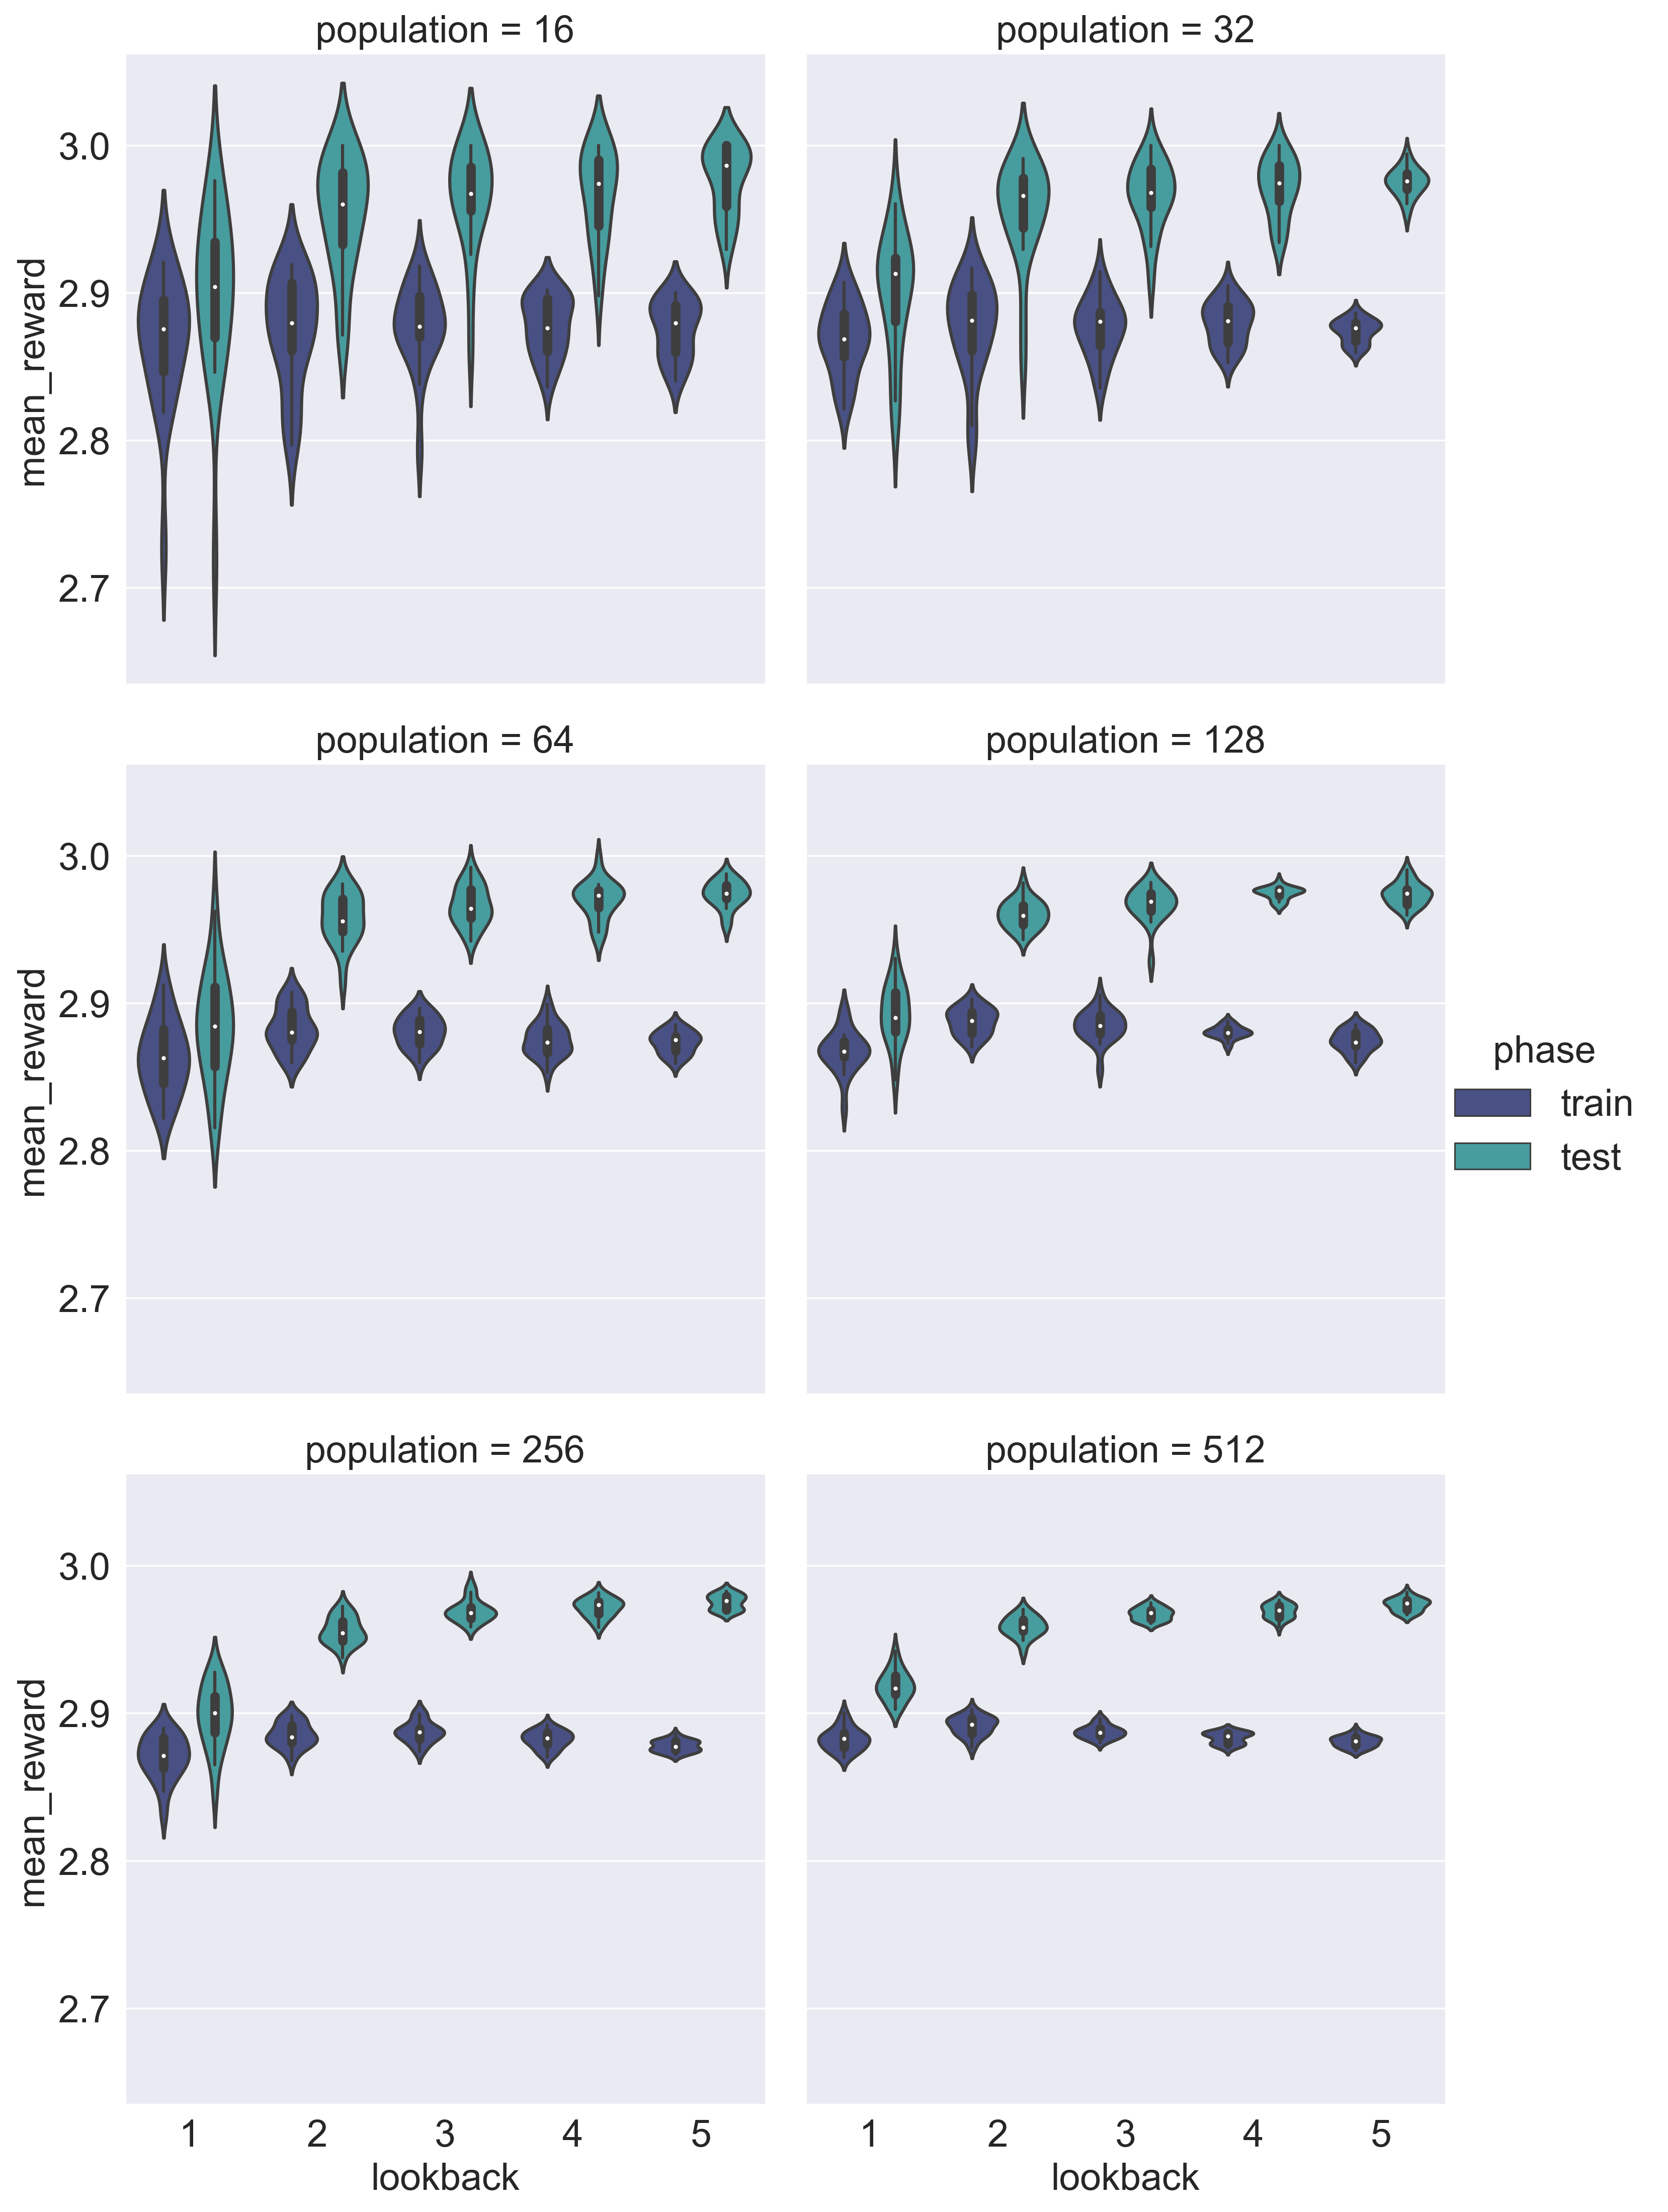

In [7]:
sns.set_style("darkgrid")

sns.catplot(
    reward_df,
    x="lookback",
    y="mean_reward",
    col="population",
    col_wrap=2,
    hue="phase",
    palette="mako",
    kind="violin",
)

In [8]:
agg_df = reward_df.groupby(["phase", "population", "lookback"]).agg(
    {"mean_reward": ["mean", "std"]}
)

agg_df

mean_reward          
                                 mean       std
phase population lookback                      
test  16         1           2.899884  0.058560
                 2           2.954040  0.038466
                 3           2.964033  0.035318
                 4           2.966755  0.030622
                 5           2.976839  0.023429
      32         1           2.900339  0.039768
                 2           2.955232  0.034339
                 3           2.966138  0.022639
                 4           2.971433  0.019826
                 5           2.974925  0.009671
      64         1           2.883270  0.036555
                 2           2.957547  0.016923
                 3           2.966041  0.013456
                 4           2.969718  0.012824
                 5           2.973694  0.009232
      128        1           2.892365  0.020079
                 2           2.960135  0.009472
                 3           2.966981  0.011907
                 4           2.974462  0.004354
                 5           2.973738  0.007805
      256        1           2.897785  0.021624
                 2           2.955886  0.009263
                 3           2.969396  0.007438
                 4           2.971562  0.006408
                 5           2.975296  0.005099
      512        1           2.918596  0.010373
                 2           2.958614  0.007060
                 3           2.967327  0.004358
                 4           2.969140  0.004941
                 5           2.973550  0.004426
train 16         1           2.866949  0.044428
                 2           2.874116  0.037040
                 3           2.877303  0.028191
                 4           2.877522  0.020202
                 5           2.875463  0.019487
      32         1           2.868780  0.024154
                 2           2.876809  0.031356
                 3           2.876856  0.019890
                 4           2.879574  0.014845
                 5           2.873962  0.007955
      64         1           2.862858  0.024891
                 2           2.882475  0.014764
                 3           2.880407  0.010518
                 4           2.874981  0.011193
                 5           2.873176  0.007594
      128        1           2.867409  0.014120
                 2           2.887471  0.009153
                 3           2.884397  0.010617
                 4           2.880120  0.004314
                 5           2.874237  0.007393
      256        1           2.869898  0.014898
                 2           2.885151  0.008435
                 3           2.887198  0.007182
                 4           2.882099  0.006049
                 5           2.877765  0.003870
      512        1           2.882360  0.007680
                 2           2.891285  0.006522
                 3           2.887323  0.004385
                 4           2.883195  0.003951
                 5           2.880713  0.003808

In [9]:
pivoted_df = (
    agg_df.reset_index()
    .pivot(["phase", "population"], columns="lookback")
    .reset_index()
)

pivoted_df

C:\Users\jerem\AppData\Local\Temp/ipykernel_21928/913573291.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_df = agg_df.reset_index().pivot(["phase", "population"], columns="lookback").reset_index()


phase population mean_reward                                \
                                  mean                                 
lookback                             1         2         3         4   
0          test         16    2.899884  2.954040  2.964033  2.966755   
1          test         32    2.900339  2.955232  2.966138  2.971433   
2          test         64    2.883270  2.957547  2.966041  2.969718   
3          test        128    2.892365  2.960135  2.966981  2.974462   
4          test        256    2.897785  2.955886  2.969396  2.971562   
5          test        512    2.918596  2.958614  2.967327  2.969140   
6         train         16    2.866949  2.874116  2.877303  2.877522   
7         train         32    2.868780  2.876809  2.876856  2.879574   
8         train         64    2.862858  2.882475  2.880407  2.874981   
9         train        128    2.867409  2.887471  2.884397  2.880120   
10        train        256    2.869898  2.885151  2.887198  2.882099   
11        train        512    2.882360  2.891285  2.887323  2.883195   

                                                                      
                         std                                          
lookback         5         1         2         3         4         5  
0         2.976839  0.058560  0.038466  0.035318  0.030622  0.023429  
1         2.974925  0.039768  0.034339  0.022639  0.019826  0.009671  
2         2.973694  0.036555  0.016923  0.013456  0.012824  0.009232  
3         2.973738  0.020079  0.009472  0.011907  0.004354  0.007805  
4         2.975296  0.021624  0.009263  0.007438  0.006408  0.005099  
5         2.973550  0.010373  0.007060  0.004358  0.004941  0.004426  
6         2.875463  0.044428  0.037040  0.028191  0.020202  0.019487  
7         2.873962  0.024154  0.031356  0.019890  0.014845  0.007955  
8         2.873176  0.024891  0.014764  0.010518  0.011193  0.007594  
9         2.874237  0.014120  0.009153  0.010617  0.004314  0.007393  
10        2.877765  0.014898  0.008435  0.007182  0.006049  0.003870  
11        2.880713  0.007680  0.006522  0.004385  0.003951  0.003808

In [10]:
for _, row in pivoted_df[pivoted_df["phase"] == "train"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$2.867 \pm 0.044$	&	$2.874 \pm 0.037$	&	$2.877 \pm 0.028$	&	$2.878 \pm 0.020$	&	$2.875 \pm 0.019$ \\
32	&	$2.869 \pm 0.024$	&	$2.877 \pm 0.031$	&	$2.877 \pm 0.020$	&	$2.880 \pm 0.015$	&	$2.874 \pm 0.008$ \\
64	&	$2.863 \pm 0.025$	&	$2.882 \pm 0.015$	&	$2.880 \pm 0.011$	&	$2.875 \pm 0.011$	&	$2.873 \pm 0.008$ \\
128	&	$2.867 \pm 0.014$	&	$2.887 \pm 0.009$	&	$2.884 \pm 0.011$	&	$2.880 \pm 0.004$	&	$2.874 \pm 0.007$ \\
256	&	$2.870 \pm 0.015$	&	$2.885 \pm 0.008$	&	$2.887 \pm 0.007$	&	$2.882 \pm 0.006$	&	$2.878 \pm 0.004$ \\
512	&	$2.882 \pm 0.008$	&	$2.891 \pm 0.007$	&	$2.887 \pm 0.004$	&	$2.883 \pm 0.004$	&	$2.881 \pm 0.004$ \\
